In [ ]:
!pip install UMAP
!pip install umap-learn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap.umap_ as umap
import umap.plot

import seaborn as sns
from matplotlib import pyplot
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show, save
from bokeh.resources import CDN
from bokeh.embed import file_html

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


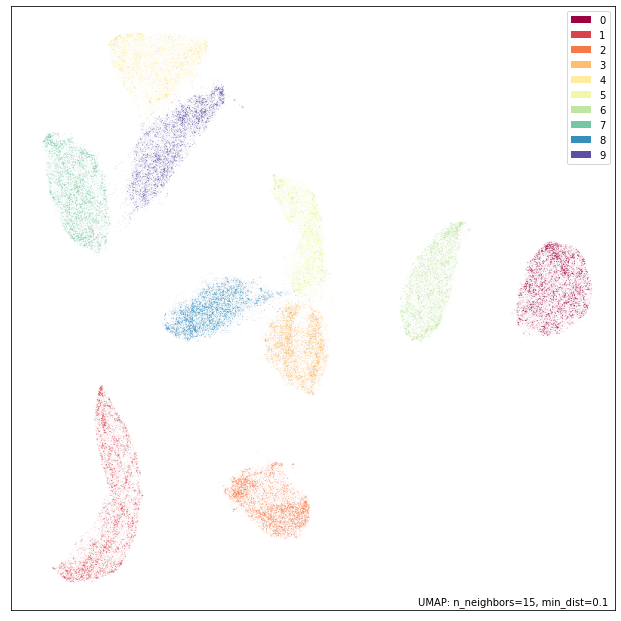

In [3]:
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
mapper = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper, labels=labels)

In [4]:
corners = np.array([
    [-5, -10],  # 1
    [-7, 6],  # 7
    [2, -8],  # 2
    [12, 4],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

In [5]:
inv_transformed_points = mapper.inverse_transform(test_pts)

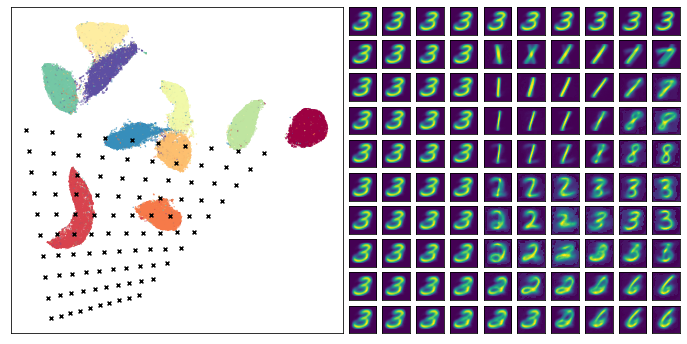

In [6]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])